In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_matrix(wfile, file):
    words = wfile.readlines()
    N_words = len(words)
    data = file.readlines()
    N_docs = len(data) // 2
    print(f'N_words = {N_words}\nN_docs = {N_docs}')

    A = np.zeros((N_words, N_docs))
    for j in range(N_docs):
        line = data[2 * j + 1].split()
        numbers = [eval(i) for i in line]
        w_idx = np.array(numbers[1::2]) - 1
        A[w_idx, j] = 1
    return A

In [3]:
wfile = open('words_idx.txt', 'r')
file = open('vectors.txt', 'r')
A = read_matrix(wfile, file)

N_words = 18446
N_docs = 139


In [4]:
def nmf_lee_seung(A, k, iters):
  N_words, N_docs = A.shape
  W = np.random.rand(N_words, k)
  H = np.random.rand(k, N_docs)

  R_norms = []
  for _ in range(iters):
    W = W * (A @ H.T) / (W @ H @ H.T)
    H = H * (W.T @ A) / (W.T @ W @ H)

    R = A - W @ H
    R_norms.append(np.linalg.norm(R, 'fro'))

  return W, H, R_norms

In [5]:
def plot_norms(norms):
  plt.plot(norms)
  plt.xlabel('Iteration')
  plt.ylabel('Frobenius Norm of $R$')
  plt.show()
  print(f'Final norm: {norms[-1]}')

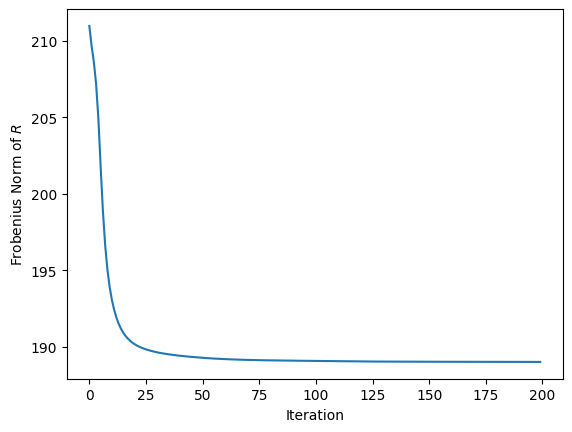

Final norm: 189.0155107935785


In [6]:
W, H, R_norms = nmf_lee_seung(A, k=10, iters=200)
plot_norms(R_norms)

### 3. (a) NMF via Projected Gradient Descent

In [7]:
def nmf_pgd(A, k, iters, alpha):
  N_words, N_docs = A.shape
  W = np.random.rand(N_words, k)
  H = np.random.rand(k, N_docs)

  R_norms = []
  for _ in range(iters):
    R = A - W @ H
    R_norms.append(np.linalg.norm(R, 'fro'))

    W = np.maximum(W + alpha * R @ H.T, 0)
    H = np.maximum(H + alpha * W.T @ R, 0)

  return W, H, R_norms

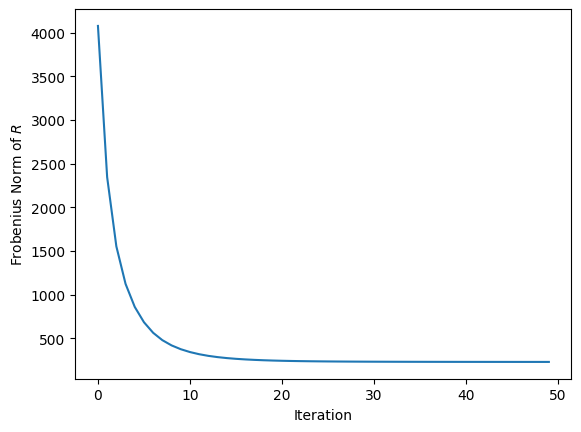

Final norm: 227.85137798557082


In [8]:
W, H, R_norms = nmf_pgd(A, k=10, iters=50, alpha=1e-5)
plot_norms(R_norms)

### 3. (b) NMF via HALS

In [9]:
def nmf_hals(A, k, iters):
  N_words, N_docs = A.shape
  W = np.random.rand(N_words, k)
  H = np.random.rand(k, N_docs)

  R_norms = []
  R = A - W @ H
  for _ in range(iters):
    for j in range(k):
      u = np.maximum(-W[:, j], (R @ H.T)[:, j] / ((H @ H.T)[j, j] + 1e-12))
      W[:, j] += u
      R = A - W @ H

    for i in range(k):
      v = np.maximum(-H[i, :], (W.T @ R)[i, :] / ((W.T @ W)[i, i] + 1e-12))
      H[i, :] += v
      R = A - W @ H

    R_norms.append(np.linalg.norm(R, 'fro'))

  return W, H, R_norms

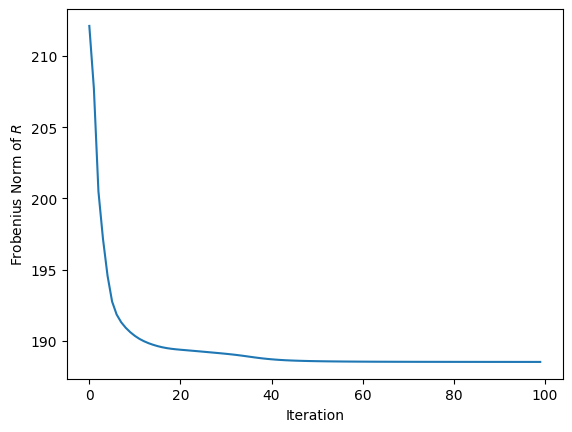

Final norm: 188.5260673166078


In [13]:
W, H, R_norms = nmf_hals(A, k=10, iters=100)
plot_norms(R_norms)

### 3. (c) Truncated SVD

In [11]:
def truncated_svd(A, k):
  U, S, V = np.linalg.svd(A, full_matrices=False)
  return U[:, :k] @ np.diag(S[:k]) @ V[:k, :]

In [12]:
A_k = truncated_svd(A, 10)
print(np.linalg.norm(A - A_k, 'fro'))

187.72408972726225
